In [2]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt

%matplotlib inline

# To install sklearn type "pip install numpy scipy scikit-learn" to the anaconda terminal

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(12,10)})

# import sys
# !conda list Check the packages installed

In [5]:
# laoding the data
raw_data=pd.read_csv("vehicle2020.csv")


FileNotFoundError: [Errno 2] No such file or directory: 'vehicle2020.csv'

In [18]:
# checking for nulls
raw_data.isnull().sum()

Date               0
Week               3
Week_ID            3
Month              3
Month_ID           3
Year               3
Day_Name           3
Visitors           3
Revenue            3
Marketing Spend    3
Promo              3
dtype: int64

In [19]:
# have a look at one column with nulls
raw_data[raw_data["Week"].isnull()] # you will see which 3 rows having missing values.

,Date,Week,Week_ID,Month,Month_ID,Year,Day_Name,Visitors,Revenue,Marketing Spend,Promo
182,10/05/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,11/05/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184,12/05/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# delete all the 3 rows
raw_data=raw_data.dropna(subset=["Week"])
raw_data.shape

(182, 11)

In [23]:
# checking for nulls AGAIN
raw_data.isnull().sum()

Date               0
Week               0
Week_ID            0
Month              0
Month_ID           0
Year               0
Day_Name           0
Visitors           0
Revenue            0
Marketing Spend    0
Promo              0
dtype: int64

In [45]:
# quick check the value summary of each features
for column in raw_data:
    unique_vals = np.unique(raw_data[column])
    nr_values = len(unique_vals)
    if nr_values < 10:
  
        print('The number of values of feature {} : {} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values of feature {} : {}'.format(column,nr_values))
        

The number of values of feature Date : 182
The number of values of feature Week : 28
The number of values of feature Week_ID : 28
The number of values of feature Month : 7 -- [ 1.  2.  3.  4.  5. 11. 12.]
The number of values of feature Month_ID : 7 -- [11. 12. 13. 14. 15. 16. 17.]
The number of values of feature Year : 2 -- [2020. 2021.]
The number of values of feature Day_Name : 7 -- ['Friday' 'Monday' 'Saturday' 'Sunday' 'Thursday' 'Tuesday' 'Wednesday']
The number of values of feature Visitors : 175
The number of values of feature Revenue : 181
The number of values of feature Marketing Spend : 182
The number of values of feature Promo : 3 -- ['No Promo' 'Promotion Blue' 'Promotion Red']


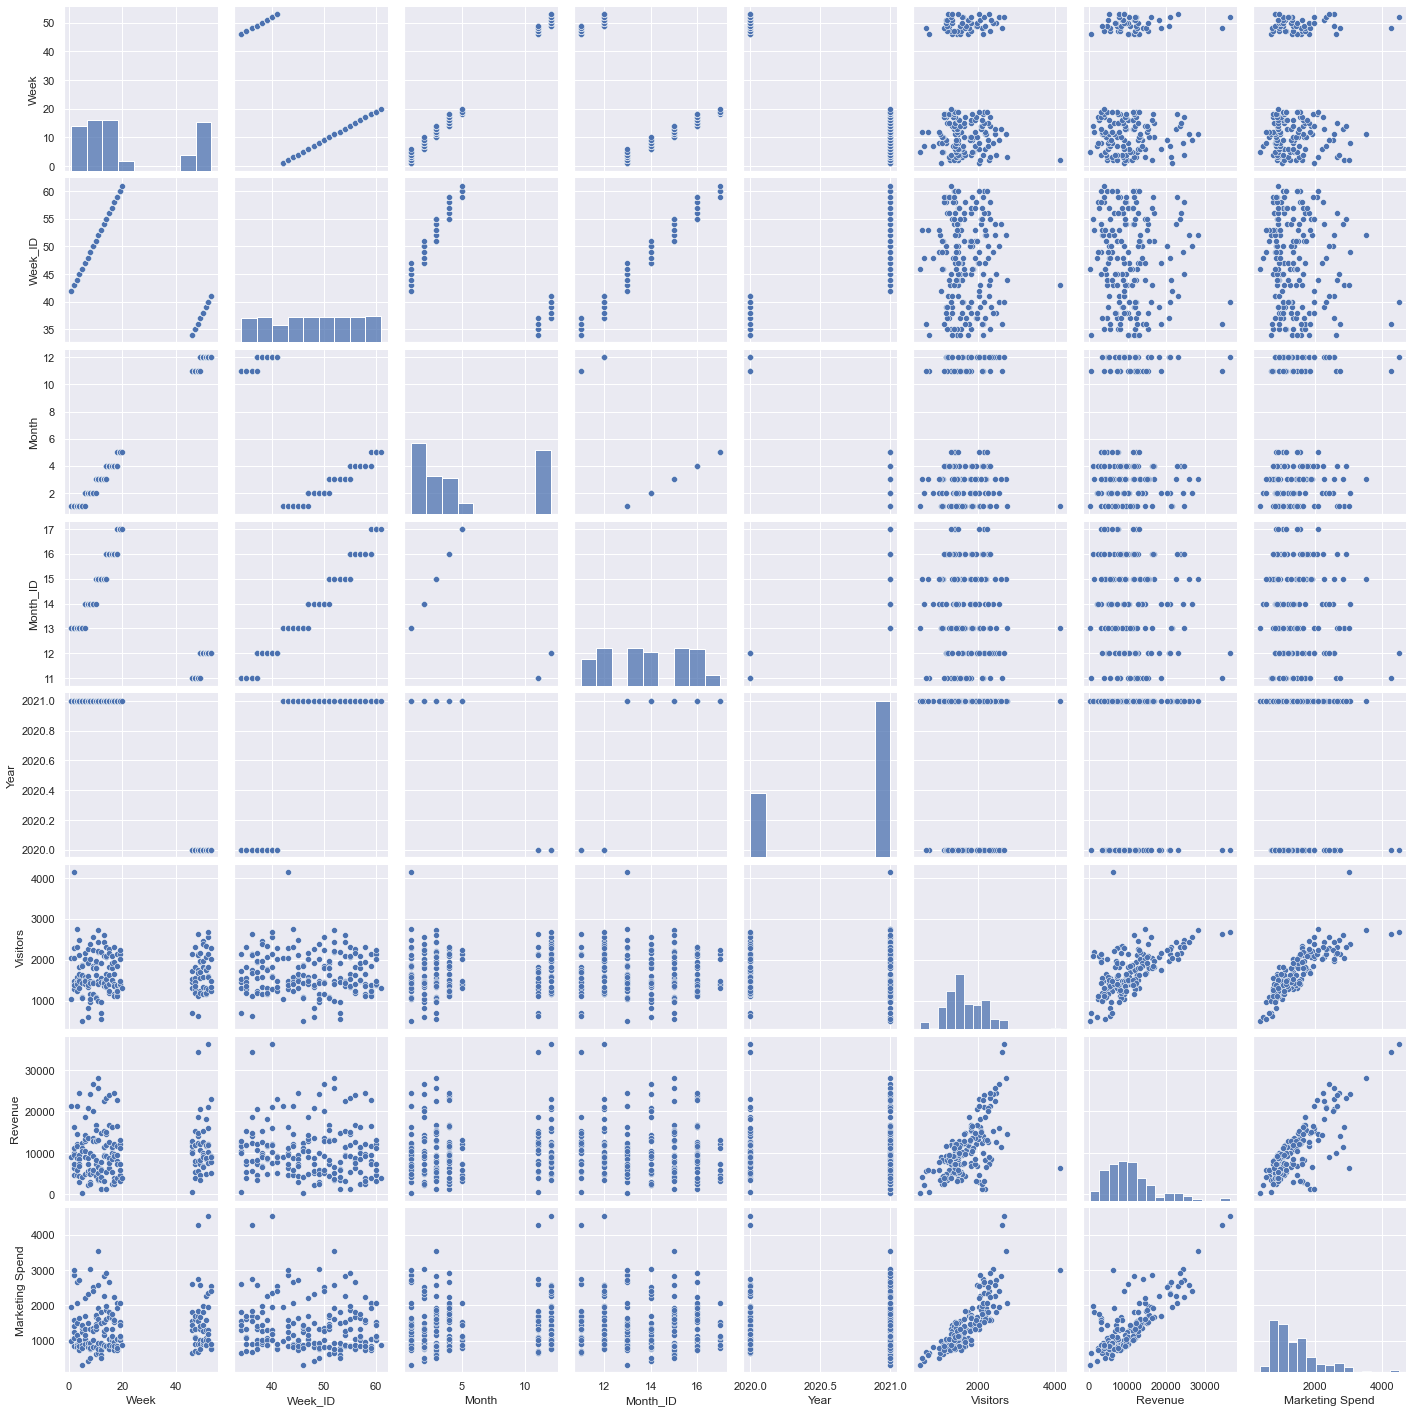

In [47]:
g=sns.pairplot(raw_data)

In [50]:
#to see column names
raw_data.columns

Index(['Date', 'Week', 'Week_ID', 'Month', 'Month_ID', 'Year', 'Day_Name',
       'Visitors', 'Revenue', 'Marketing Spend', 'Promo'],
      dtype='object')

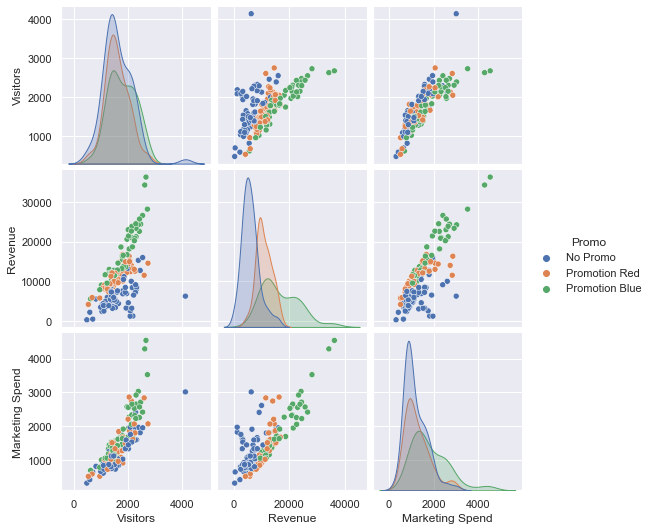

In [49]:
# if i only want to view subset of the data
g=sns.pairplot(raw_data[["Visitors","Revenue","Marketing Spend","Promo"]],hue="Promo")  # this is the category

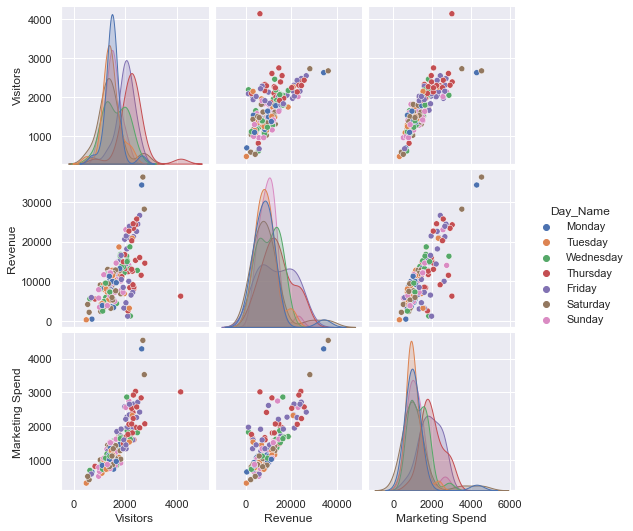

In [51]:
g=sns.pairplot(raw_data[["Visitors","Revenue","Marketing Spend","Day_Name"]],hue="Day_Name")  # this is the category

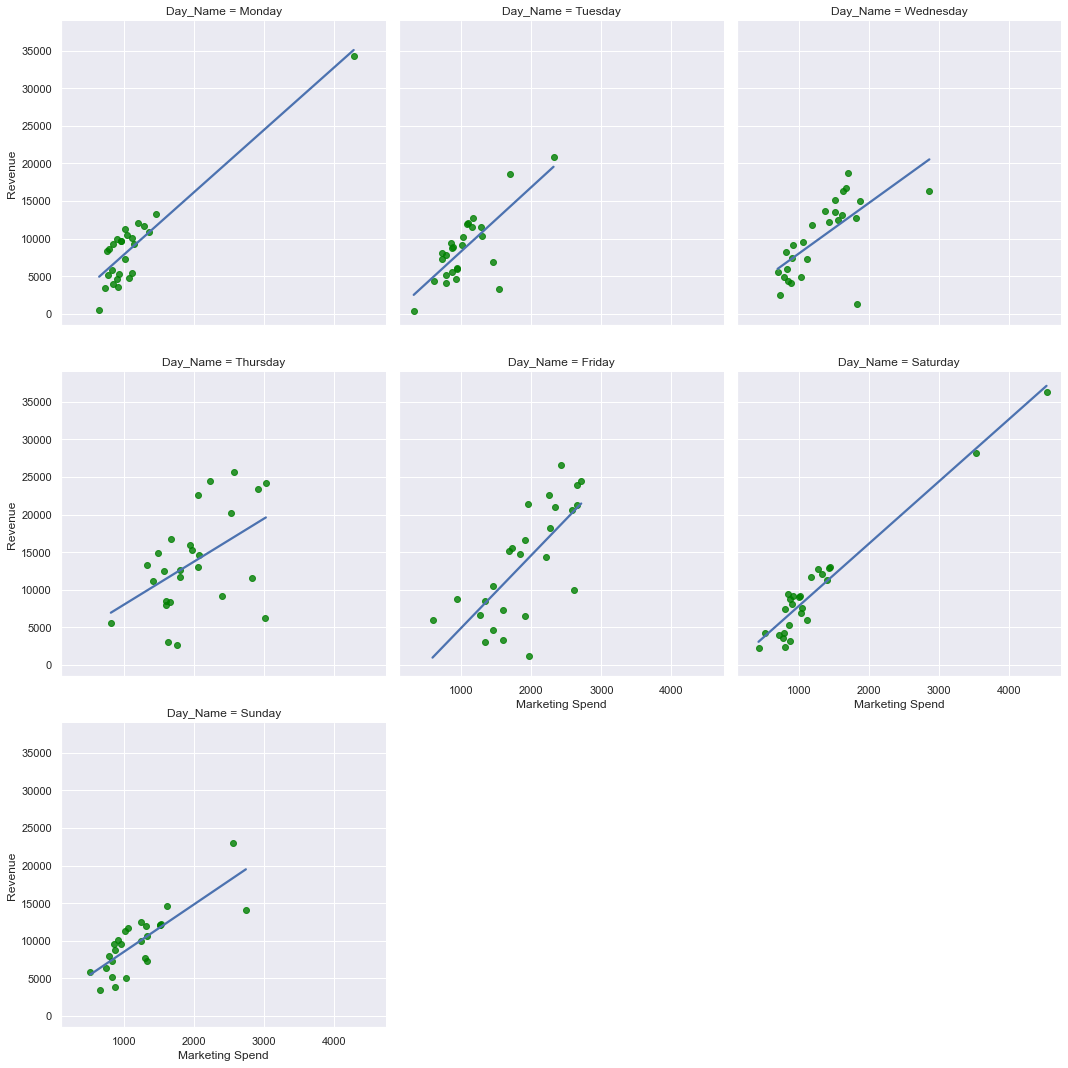

In [60]:
# this is only to see the relationship between x AND y
g=sns.lmplot(x="Marketing Spend",y="Revenue",data=raw_data,col="Day_Name",col_wrap=3,height=5,scatter_kws={"color" : "green"},ci=False)

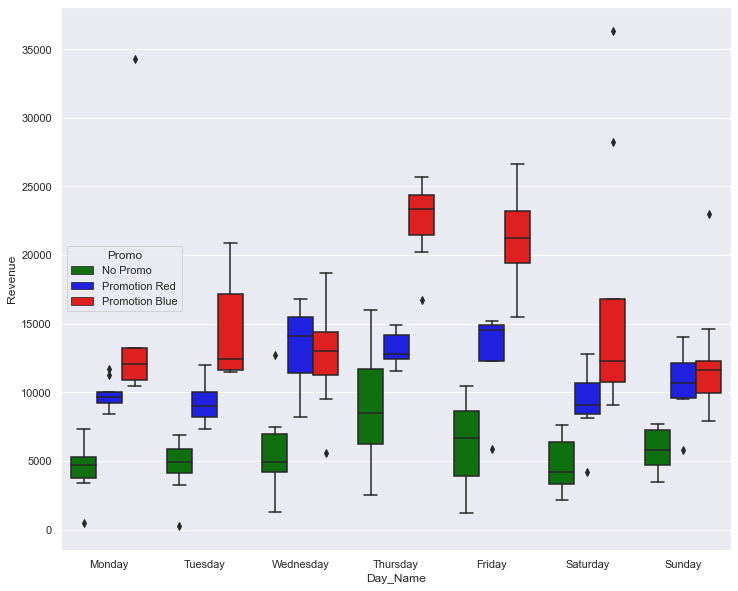

In [64]:
pal=['green','blue','red']
g=sns.boxplot(x="Day_Name",y="Revenue",data=raw_data,hue="Promo",palette=pal)

In [67]:
# have a look at the outliers
raw_data=raw_data[raw_data["Revenue"]<27000]
raw_data.shape

(179, 11)

In [70]:
# drop unnecessary columns
raw_data.columns

Index(['Date', 'Week', 'Week_ID', 'Month', 'Month_ID', 'Year', 'Day_Name',
       'Visitors', 'Revenue', 'Marketing Spend', 'Promo'],
      dtype='object')

In [73]:
raw_data=raw_data[['Day_Name',
       'Visitors', 'Revenue', 'Marketing Spend', 'Promo']]
raw_data.head()

,Day_Name,Visitors,Revenue,Marketing Spend,Promo
0,Monday,707.0,465.0,651.375,No Promo
1,Tuesday,1455.0,10386.0,1298.250,Promotion Red
2,Wednesday,1520.0,12475.0,1559.375,Promotion Blue
3,Thursday,1726.0,11712.0,1801.750,No Promo
4,Friday,2134.0,10000.0,2614.500,No Promo


In [81]:
# dummy variables
new_raw_data=pd.get_dummies(raw_data,columns=["Promo","Day_Name"])
new_raw_data.head()

,Visitors,Revenue,Marketing Spend,Promo_No Promo,Promo_Promotion Blue,Promo_Promotion Red,Day_Name_Friday,Day_Name_Monday,Day_Name_Saturday,Day_Name_Sunday,Day_Name_Thursday,Day_Name_Tuesday,Day_Name_Wednesday
0,707.0,465.0,651.375,1,0,0,0,1,0,0,0,0,0
1,1455.0,10386.0,1298.250,0,0,1,0,0,0,0,0,1,0
2,1520.0,12475.0,1559.375,0,1,0,0,0,0,0,0,0,1
3,1726.0,11712.0,1801.750,1,0,0,0,0,0,0,1,0,0
4,2134.0,10000.0,2614.500,1,0,0,1,0,0,0,0,0,0


In [86]:
 ## feature selection
hm=new_raw_data[["Visitors","Revenue","Marketing Spend" ]].corr()

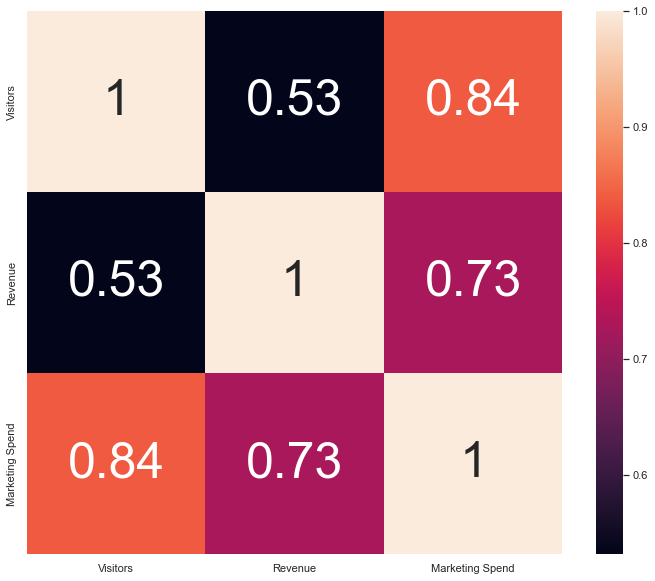

In [89]:
#visualise the corr
g=sns.heatmap(hm,annot=True, annot_kws={'size':50})

In [119]:
# split dataset to X and Y
X= new_raw_data.drop("Revenue",axis=1).values
X2= new_raw_data.drop("Revenue",axis=1) ## this is for later use.
Y= new_raw_data["Revenue"]
print(X.shape)
print(Y.shape)


(179, 12)
(179,)


In [95]:
# use decision tree to select features
# Run a Tree-based estimators (i.e. decision trees )

dt = DecisionTreeClassifier(random_state=15, criterion  = 'entropy', max_depth = 10)
dt.fit(X,Y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [98]:
# after we fit the DS, we look at the feature importance

for i, column in enumerate(new_raw_data.drop("Revenue",axis=1)):
    print("The feature importance for {} is: {:.3f}".format(column,dt.feature_importances_[i]))

The feature importance for Visitors is: 0.332
The feature importance for Marketing Spend is: 0.438
The feature importance for Promo_No Promo is: 0.032
The feature importance for Promo_Promotion Blue is: 0.047
The feature importance for Promo_Promotion Red is: 0.045
The feature importance for Day_Name_Friday is: 0.013
The feature importance for Day_Name_Monday is: 0.014
The feature importance for Day_Name_Saturday is: 0.013
The feature importance for Day_Name_Sunday is: 0.016
The feature importance for Day_Name_Thursday is: 0.020
The feature importance for Day_Name_Tuesday is: 0.017
The feature importance for Day_Name_Wednesday is: 0.013


In [102]:
# split train and test
# Hold-out validation

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.80, test_size = 0.2, random_state=15)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(143, 12)
(36, 12)
(143,)
(36,)


In [104]:
lm=LinearRegression(fit_intercept=True)
lm.fit(X_train,Y_train)
Y_pred = lm.predict(X_train)

In [111]:
# Model Accuracy on training dataset -- SAME VALUES, R^2

print('The Accuracy  on the training dataset is: ', lm.score(X_train, Y_train) )
print('The Accuracy n2  on the training dataset is: ',r2_score(Y_train,Y_pred) ) 

# testing the model accuracy for test dataset
print("")
print('The Accuracy  on the training dataset is: ', lm.score(X_test, Y_test) )
 
# The Root Mean Squared Error (RMSE)
print("")
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(Y_train,Y_pred)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(Y_test,lm.predict(X_test))))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(Y_train,Y_pred))
print('The MAE  on the testing dataset is: ',mean_absolute_error(Y_test,lm.predict(X_test)))


print("")
# Coefficients
print('Coefficients: ', lm.coef_ )

print("")
# The Intercept
print('Intercept: ', lm.intercept_)



The Accuracy  on the training dataset is:  0.791949990505602
The Accuracy n2  on the training dataset is:  0.791949990505602

The Accuracy  on the training dataset is:  0.7511903865386681

The RMSE  on the training dataset is:  2618.561282656437
The RMSE  on the testing dataset is:  2340.420087349011

The MAE  on the training dataset is:  1928.0670665528867
The MAE  on the testing dataset is:  1692.3835577162288

Coefficients:  [0.972169 3.695615 -4295.876540 3724.690590 571.185949 738.005738
 -352.308895 -902.241594 -155.867567 814.821481 150.084913 -292.494076]

Intercept:  4060.650366499688


/var/folders/4v/8s_st9ts6mb1xndxc2t5bsfw0000gn/T/ipykernel_9112/3702560549.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'k--', c='red', lw=3)


Text(0.5, 1.0, 'Actuals Vs Predicted Values')

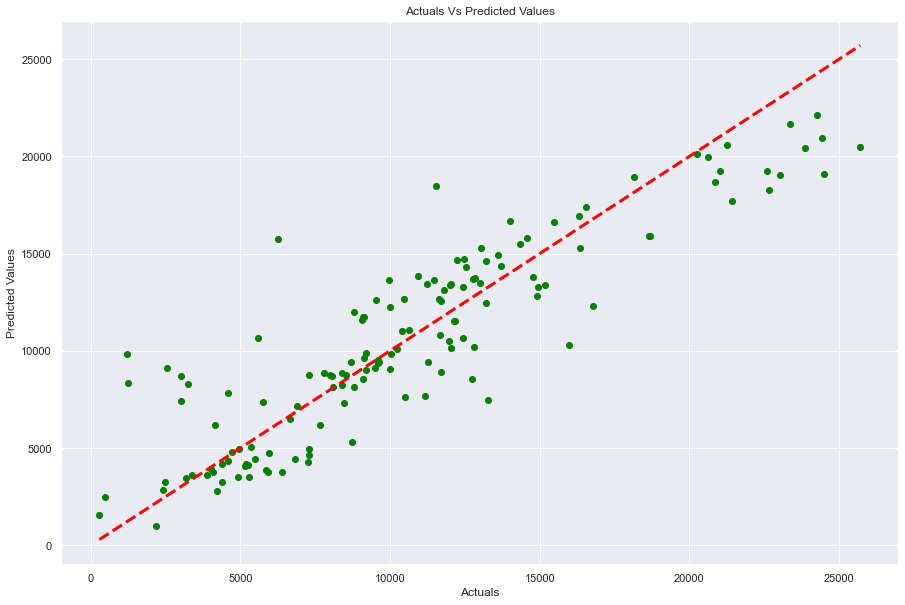

In [113]:
# Plotting Actuals Vs Predicted

plt.figure(figsize=(15,10))

plt.scatter(Y_train, Y_pred, c='green')
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'k--', c='red', lw=3)
plt.xlabel('Actuals')
plt.ylabel('Predicted Values')
plt.title('Actuals Vs Predicted Values')
# increase size

/Users/ameliekong/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Actuals Vs Residuals')

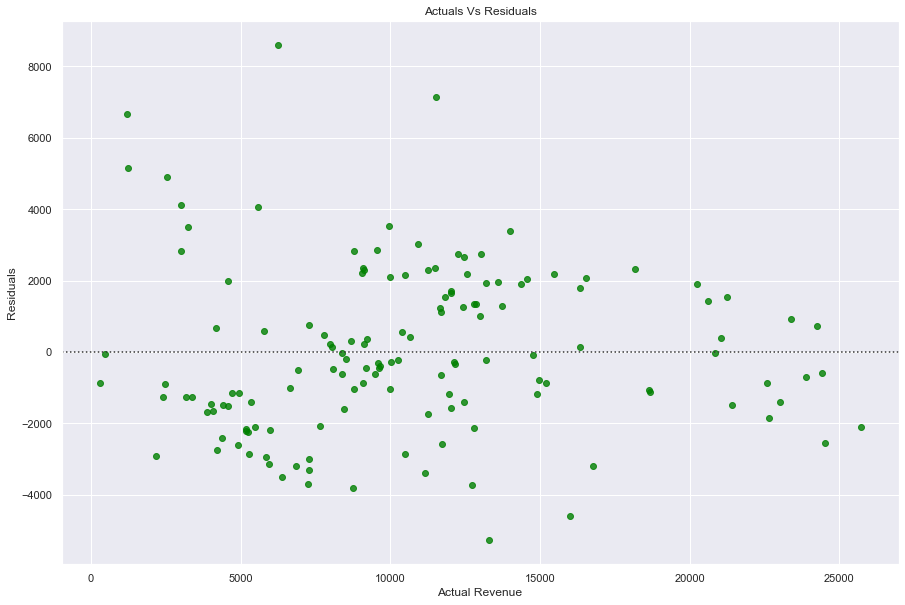

In [112]:
# Ploting Residuals

plt.figure(figsize=(15,10))

sns.residplot(Y_train, Y_pred, color='green')
plt.xlabel('Actual Revenue')
plt.ylabel('Residuals')
plt.title('Actuals Vs Residuals')

In [120]:
X2.columns

Index(['Visitors', 'Marketing Spend', 'Promo_No Promo', 'Promo_Promotion Blue',
       'Promo_Promotion Red', 'Day_Name_Friday', 'Day_Name_Monday',
       'Day_Name_Saturday', 'Day_Name_Sunday', 'Day_Name_Thursday',
       'Day_Name_Tuesday', 'Day_Name_Wednesday'],
      dtype='object')

In [126]:
##PREDICTION
coeff=lm.coef_
coeff.shape
#reshape from row to columns, because i want to have 12 columns with names to represent the coeffieicnts
coeff=coeff.reshape(-1,12)
# create dataframe
coeff_df=pd.DataFrame(coeff,columns=['Visitors', 'Marketing Spend', 'Promo_No Promo', 'Promo_Promotion Blue',
       'Promo_Promotion Red', 'Day_Name_Friday', 'Day_Name_Monday',
       'Day_Name_Saturday', 'Day_Name_Sunday', 'Day_Name_Thursday',
       'Day_Name_Tuesday', 'Day_Name_Wednesday'])
coeff_df

,Visitors,Marketing Spend,Promo_No Promo,Promo_Promotion Blue,Promo_Promotion Red,Day_Name_Friday,Day_Name_Monday,Day_Name_Saturday,Day_Name_Sunday,Day_Name_Thursday,Day_Name_Tuesday,Day_Name_Wednesday
0,0.972169,3.695615,-4295.87654,3724.69059,571.185949,738.005738,-352.308895,-902.241594,-155.867567,814.821481,150.084913,-292.494076


In [127]:
# Making Predictions                        

# Variables

Day = 'Day_Name_Friday'
Visitors = 8000
Marketing_Spend = 5000
Promo = 'Promo_Promotion Red'

# Regression Formula for pred
# y = a + bx + ..   # Where y = price, a = intercept,  b = no. of Visitors and x = coefficient of engine size

# Prediction Calculator
pred1 = (lm.intercept_) + (coeff_df[Day].values[0] * 1) + (coeff_df['Visitors'].values[0] * Visitors) + (coeff_df['Marketing Spend'].values[0] * Marketing_Spend) + (coeff_df[Promo].values[0] * 1)

print('The predicted Revenue is: ', pred1)

The predicted Revenue is:  31625.267849885473
